#### EDA PART B

In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import calendar

In [2]:
LA_monthly = pd.read_csv('Los_Angeles_Monthly.csv') 
SF_monthly = pd.read_csv('San_Francisco_Monthly.csv') 
FP_monthly = pd.read_csv('Fort_Pulaski_Monthly.csv') 
NY_monthly = pd.read_csv('New_York_Monthly.csv') 

lmo = LA_monthly['MSL (m)']
ldt = LA_monthly['Date']
ldt = ldt.apply(pd.to_datetime)

sfmo = SF_monthly['MSL (m)']
sfdt = SF_monthly['Date']
sfdt = sfdt.apply(pd.to_datetime)

fpmo = FP_monthly['MSL (m)']
fpdt = FP_monthly['Date']
fpdt = fpdt.apply(pd.to_datetime)

nymo = NY_monthly['MSL (m)']
nydt = NY_monthly['Date']
nydt = nydt.apply(pd.to_datetime)

Text(0, 0.5, 'Mean Sea Level (m)')

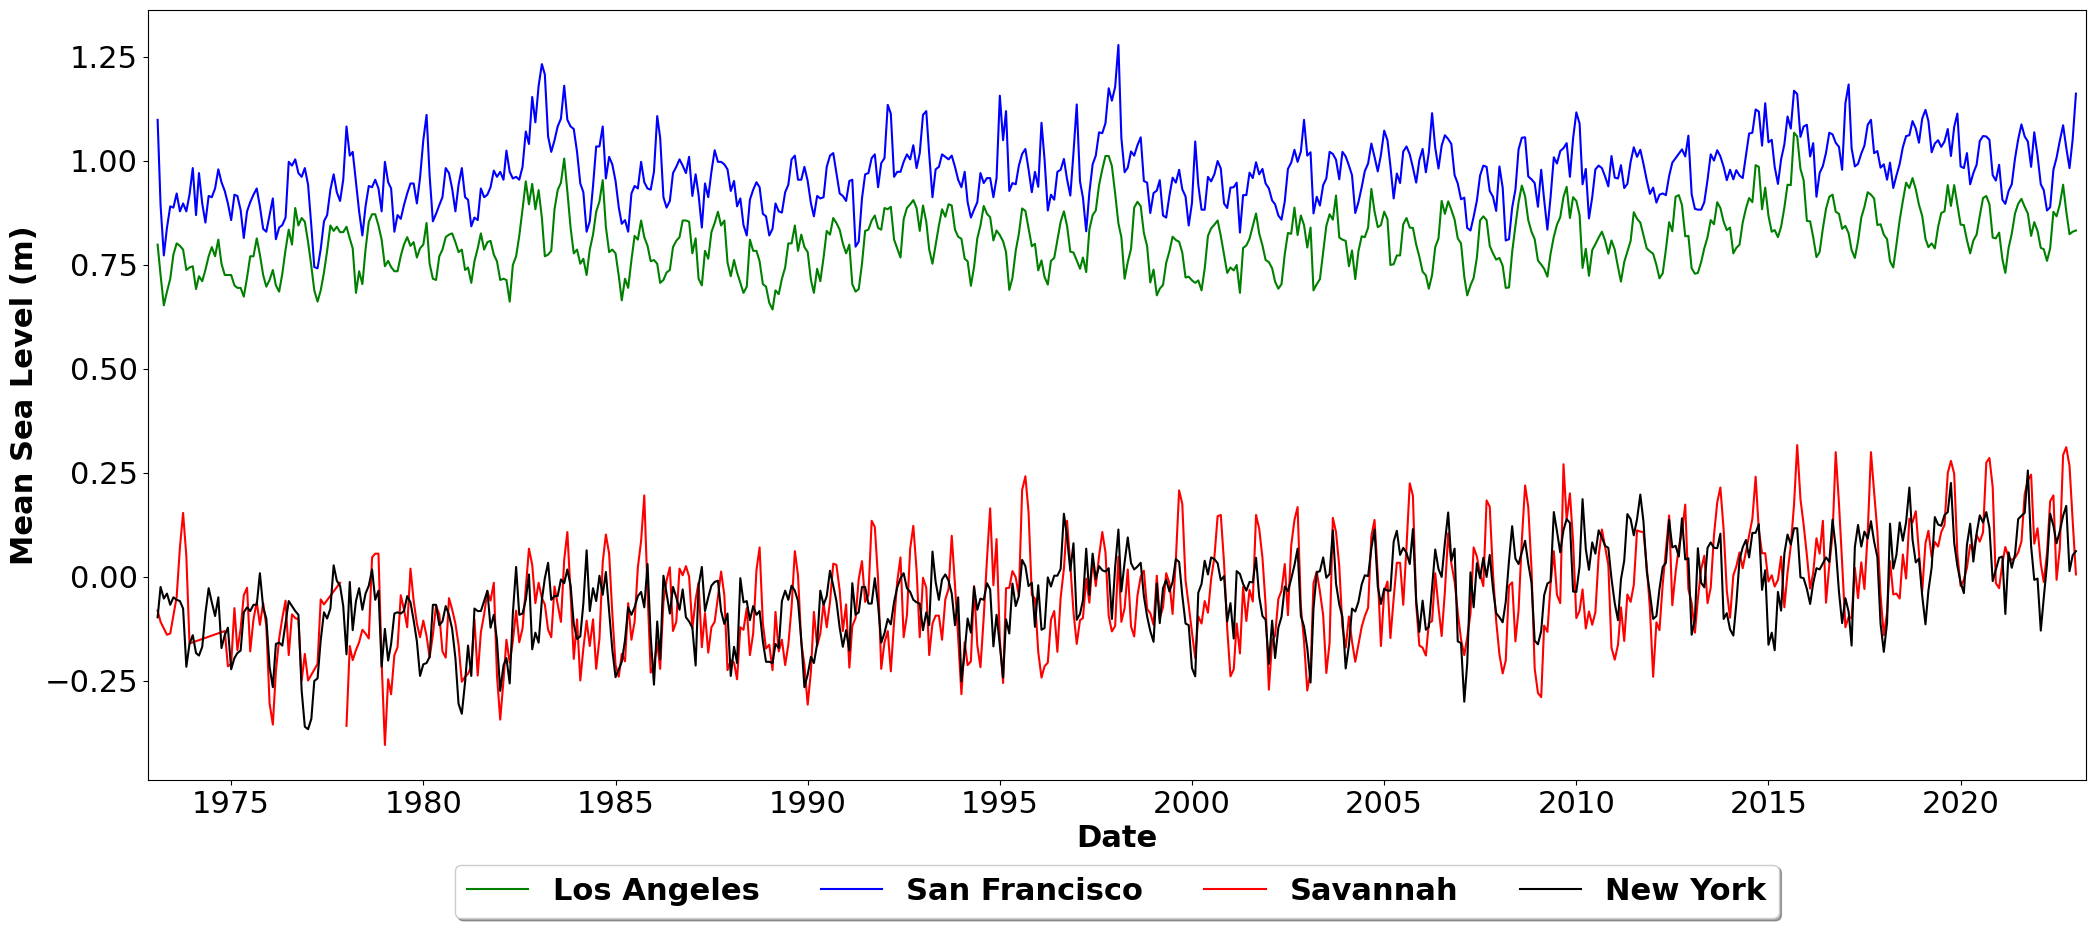

In [10]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(25,10))
plt.plot(ldt, lmo,"-g", label = "Los Angeles")
plt.plot(sfdt, sfmo,"-b", label = "San Francisco")
plt.plot(fpdt, fpmo,"-r", label = "Savannah")
plt.plot(nydt, nymo,"-k", label = "New York")

#format
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09),fancybox=True, shadow=True, ncol=4)
ax.margins(x=0.005)
plt.xticks(ha='center',fontweight='normal')
plt.yticks(fontweight='normal')
ax.set_xlabel('Date',fontweight='bold')
ax.set_ylabel('Mean Sea Level (m)',fontweight='bold')

In [4]:
# # values for table
# avny = NY_monthly["MSL (m)"]
# #NY_monthly.tail(13)
# ny22 = avny[587:599]
# #print(ny22)
# print(ny22.mean())

# avfp = FP_monthly["MSL (m)"]
# #FP_monthly.loc[569:580]
# fp22 = avfp[569:581]
# #print(fp22)
# print(fp22.mean())

# avsf = SF_monthly["MSL (m)"]
# #SF_monthly.loc[585:596]
# sf22 = avsf[585:597]
# #print(sf22)
# print(sf22.mean())

# avla = LA_monthly["MSL (m)"]
# #LA_monthly.loc[587:598]
# la22 = avla[587:599]
# #print(la22)
# print(la22.mean())

# yr73 = av1[0:11]
# print(yr73.mean())

# #extremes and year
# col = "MSL (m)"
# max_x = SF_monthly.loc[SF_monthly[col].idxmax()] #change idxmax-idxmin, city
# print(max_x)

Monthly

In [5]:
#process
FP_monthly = pd.read_csv('Fort_Pulaski_Monthly.csv') 
FP_monthly = FP_monthly[["Date", "MSL (m)"]]
FP_monthly["Date"] = pd.to_datetime(FP_monthly["Date"])
FP_monthly['Month'] = pd.DatetimeIndex(FP_monthly['Date']).month
FP_monthly['Month'] = FP_monthly['Month'].apply(lambda x: calendar.month_abbr[x])
FP_monthly['Year'] = pd.DatetimeIndex(FP_monthly['Date']).year

NY_monthly = pd.read_csv('New_York_Monthly.csv') 
NY_monthly = NY_monthly[["Date", "MSL (m)"]]
NY_monthly["Date"] = pd.to_datetime(NY_monthly["Date"]) 
NY_monthly['Month'] = pd.DatetimeIndex(NY_monthly['Date']).month
NY_monthly['Month'] = NY_monthly['Month'].apply(lambda x: calendar.month_abbr[x])
NY_monthly['Year'] = pd.DatetimeIndex(NY_monthly['Date']).year

LA_monthly = pd.read_csv('Los_Angeles_Monthly.csv') 
LA_monthly = LA_monthly[["Date", "MSL (m)"]]
LA_monthly["Date"] = pd.to_datetime(LA_monthly["Date"])
LA_monthly['Month'] = pd.DatetimeIndex(LA_monthly['Date']).month
LA_monthly['Month'] = LA_monthly['Month'].apply(lambda x: calendar.month_abbr[x])
LA_monthly['Year'] = pd.DatetimeIndex(LA_monthly['Date']).year

SF_monthly = pd.read_csv('San_Francisco_Monthly.csv') 
SF_monthly = SF_monthly[["Date", "MSL (m)"]]
SF_monthly["Date"] = pd.to_datetime(SF_monthly["Date"])
SF_monthly['Month'] = pd.DatetimeIndex(SF_monthly['Date']).month
SF_monthly['Month'] = SF_monthly['Month'].apply(lambda x: calendar.month_abbr[x])
SF_monthly['Year'] = pd.DatetimeIndex(SF_monthly['Date']).year

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


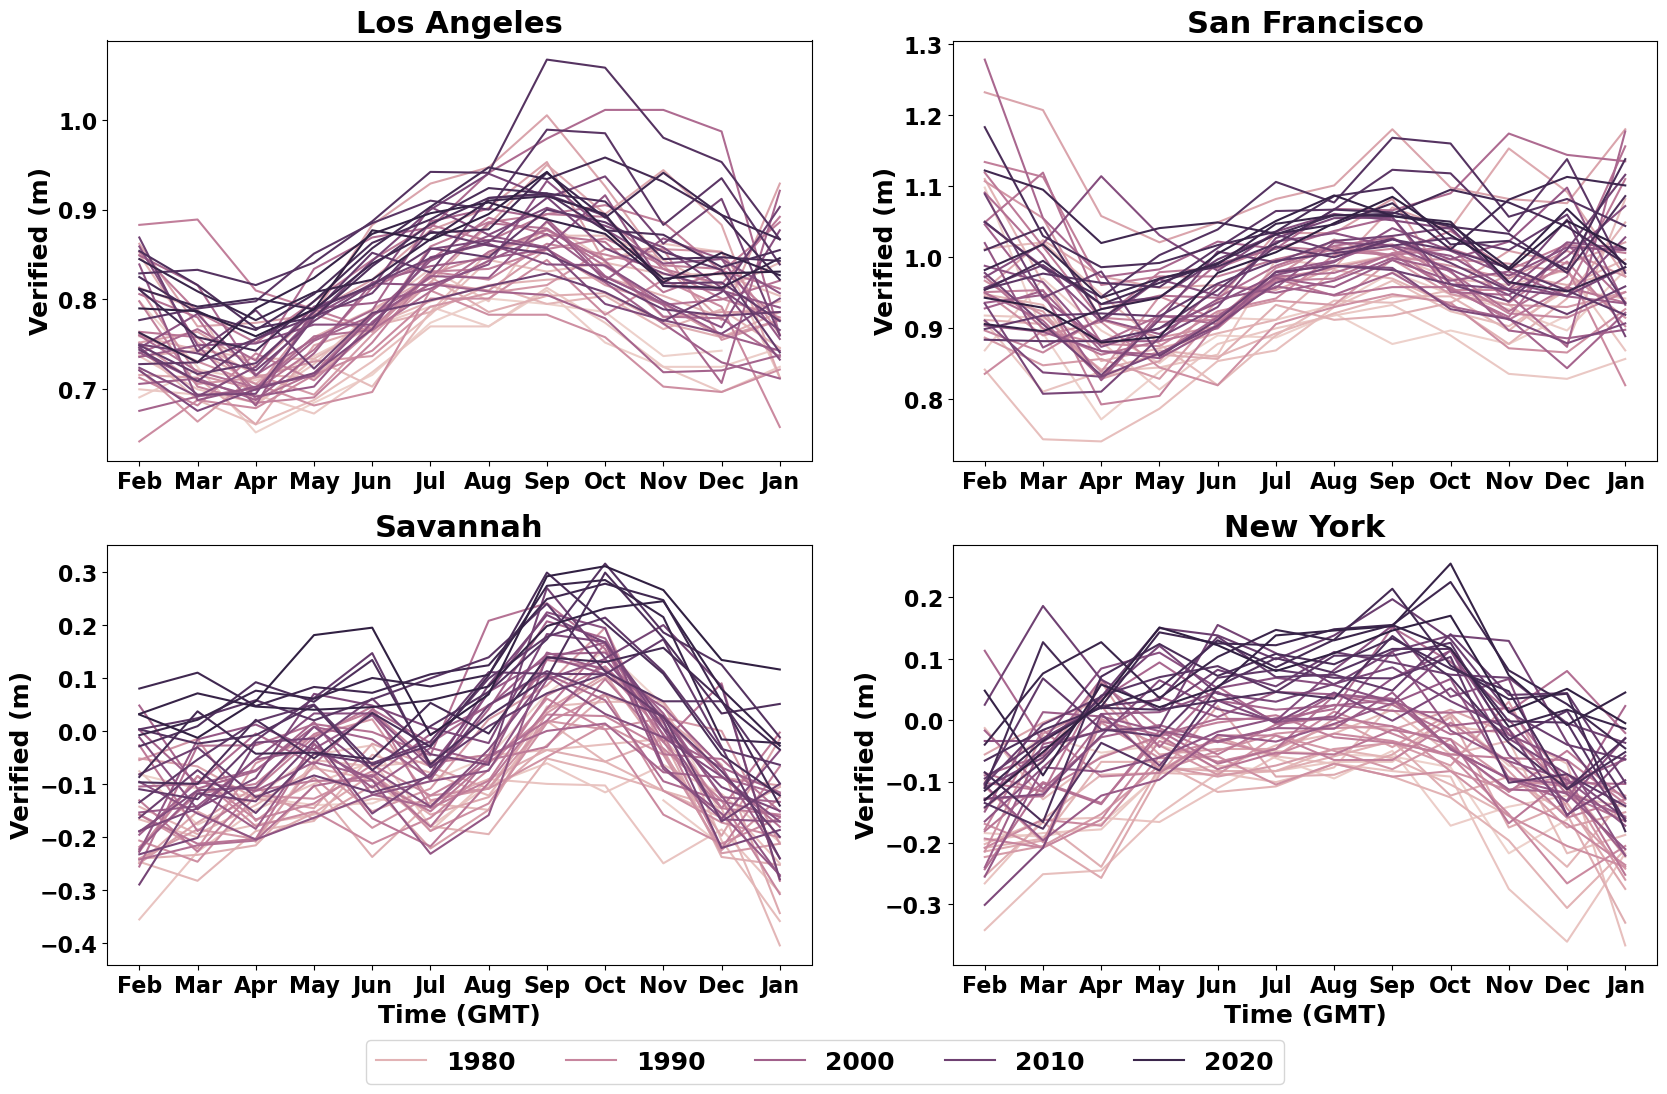

In [6]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))
#generate figures
sns.lineplot(legend = False,data = LA_monthly, x='Month', y='MSL (m)', hue = 'Year',ax=axs[0, 0])
axs[0, 0].set_title("Los Angeles", fontsize=22,fontweight='bold')
axs[0, 0].set_xlabel('')

sns.lineplot(legend = False,data = SF_monthly, x='Month', y='MSL (m)', hue = 'Year', ax=axs[0, 1])
axs[0, 1].set_title('San Francisco', fontsize=22,fontweight='bold')
axs[0, 1].set_xlabel('')

sns.lineplot(data = FP_monthly, x='Month', y='MSL (m)', hue = 'Year', ax=axs[1, 0])
axs[1, 0].set_title('Savannah', fontsize=22,fontweight='bold')
axs[1,0].legend(loc='upper left', bbox_to_anchor=(0.35, -0.15), ncol=5,fontsize=18)
axs[1,0].set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')

sns.lineplot(legend = False,data = NY_monthly, x='Month', y='MSL (m)', hue = 'Year',ax=axs[1, 1])
axs[1, 1].set_title('New York', fontsize=22,fontweight='bold')
axs[1, 1].set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')

# format
for ax in axs.flat:
    ax.set_ylabel('Verified (m)', fontsize=18,fontweight='bold')

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

Hourly

In [7]:
# preprocess
LA_hourly = pd.read_csv('Los_Angeles_Hourly.csv') 
LA_hourly = LA_hourly[["Date","Time (GMT)","Verified (m)"]] 
LA_hourly["Date"] = pd.to_datetime(LA_hourly["Date"])
LA_hourly['Month'] = pd.DatetimeIndex(LA_hourly['Date']).month
LA_hourly['Day'] = pd.DatetimeIndex(LA_hourly['Date']).day
LA_hourly['Month'] = LA_hourly['Month'].apply(lambda x: calendar.month_abbr[x])
LA_hourly.drop(['Date'], axis=1,inplace=True) 

SF_hourly = pd.read_csv('San_Francisco_Hourly.csv') 
SF_hourly = SF_hourly[["Date","Time (GMT)","Verified (m)"]] 
SF_hourly["Date"] = pd.to_datetime(SF_hourly["Date"])
SF_hourly['Month'] = pd.DatetimeIndex(SF_hourly['Date']).month
SF_hourly['Day'] = pd.DatetimeIndex(SF_hourly['Date']).day
SF_hourly['Month'] = SF_hourly['Month'].apply(lambda x: calendar.month_abbr[x])
SF_hourly.drop(['Date'], axis=1,inplace=True) 

FP_hourly = pd.read_csv('Fort_Pulaski_hourly.csv') 
FP_hourly = FP_hourly[["Date","Time (GMT)","Verified (m)"]]
FP_hourly["Date"] = pd.to_datetime(FP_hourly["Date"])
FP_hourly['Month'] = pd.DatetimeIndex(FP_hourly['Date']).month
FP_hourly['Day'] = pd.DatetimeIndex(FP_hourly['Date']).day
FP_hourly['Month'] = FP_hourly['Month'].apply(lambda x: calendar.month_abbr[x])
FP_hourly.drop(['Date'], axis=1,inplace=True)

NY_hourly = pd.read_csv('New_York_hourly.csv') 
NY_hourly = NY_hourly[["Date","Time (GMT)","Verified (m)"]]
NY_hourly["Date"] = pd.to_datetime(NY_hourly["Date"])
NY_hourly['Month'] = pd.DatetimeIndex(NY_hourly['Date']).month
NY_hourly['Day'] = pd.DatetimeIndex(NY_hourly['Date']).day
NY_hourly['Month'] = NY_hourly['Month'].apply(lambda x: calendar.month_abbr[x])
NY_hourly.drop(['Date'], axis=1,inplace=True) 

#month of april
april_la = LA_hourly.loc[1416:2135]
april_sf = SF_hourly.loc[1416:2135]
april_ny = NY_hourly.loc[1416:2135]
april_fp = FP_hourly.loc[1416:2135]

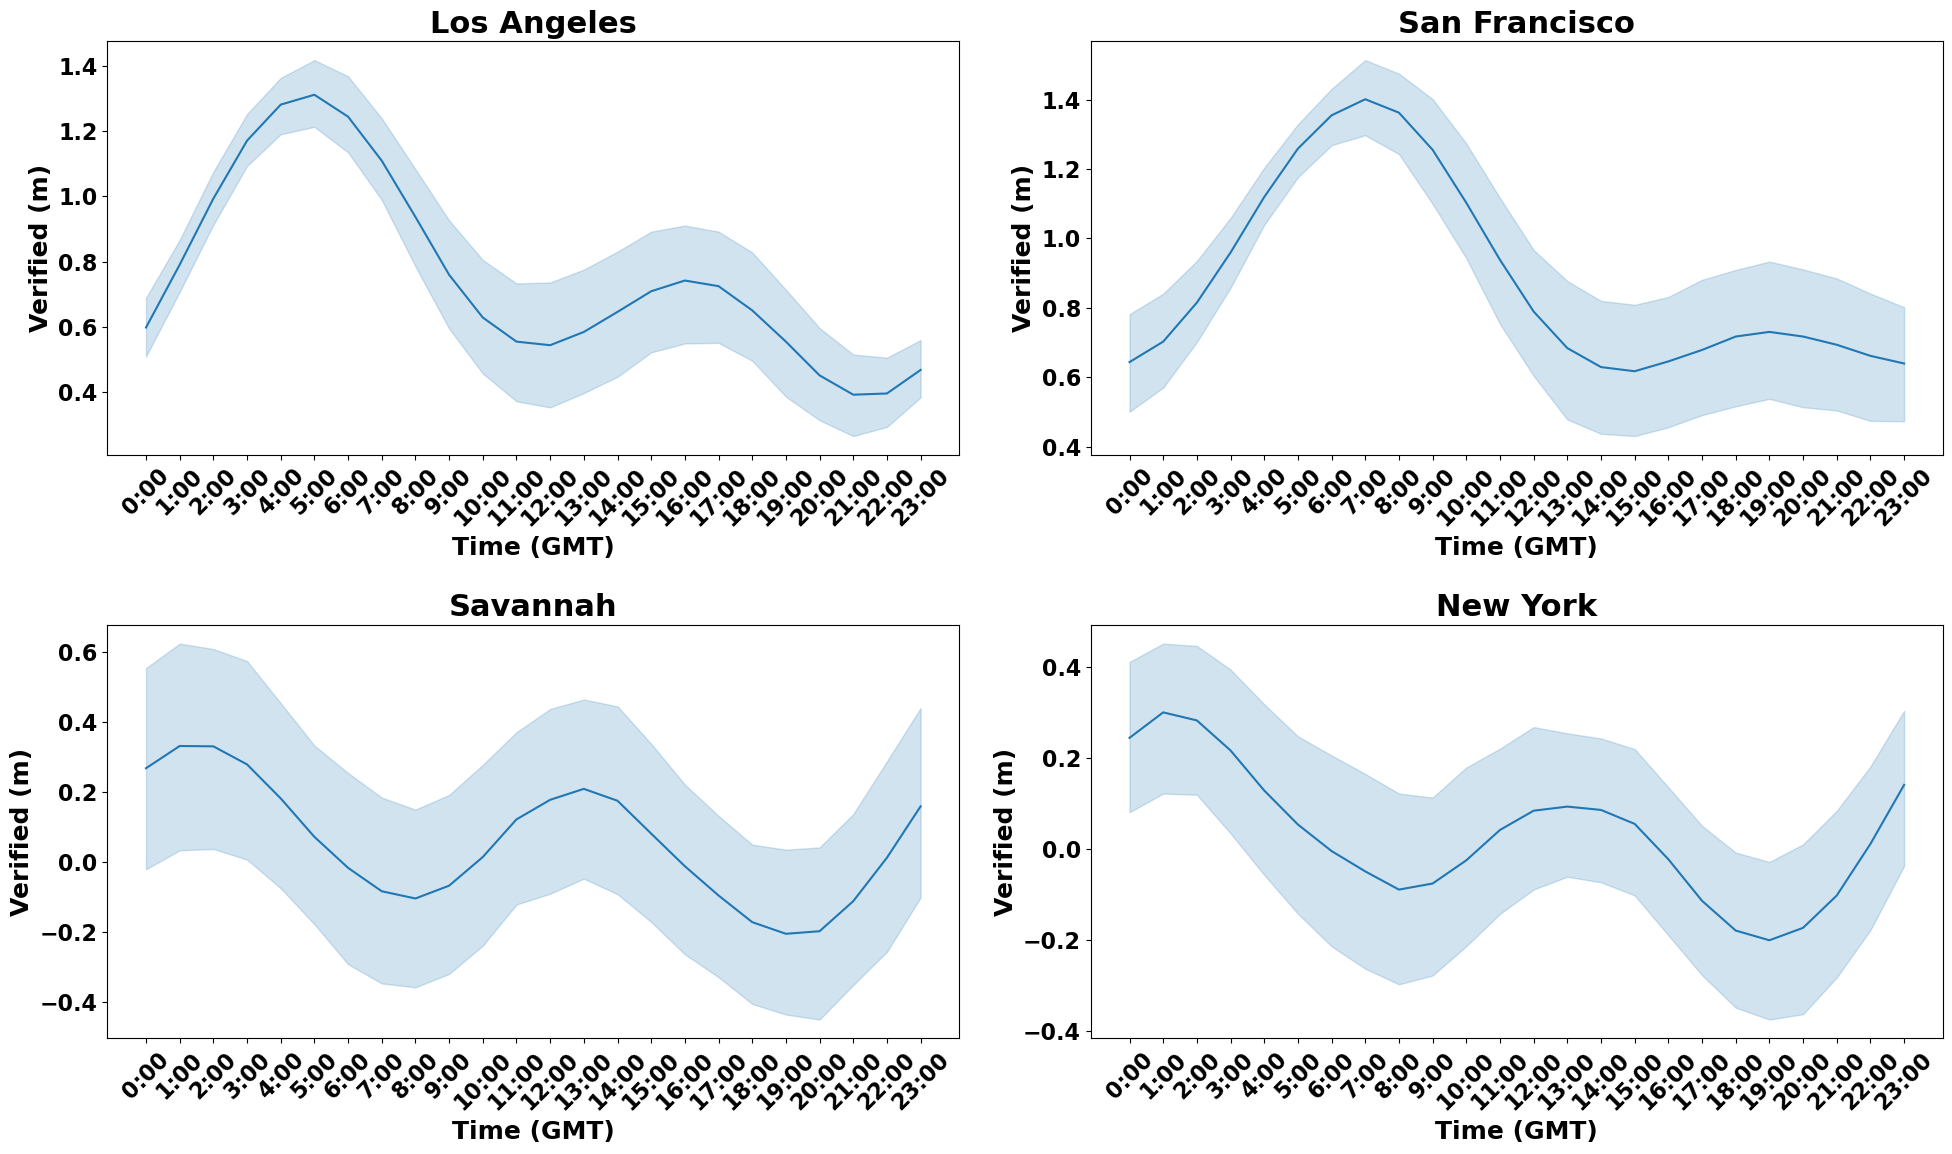

In [8]:
#hourly for april 2022
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))
#generate
sns.lineplot(legend = False,data = april_la, x='Time (GMT)', y='Verified (m)',hue = 'Month',ax=axs[0, 0])
axs[0, 0].set_title("Los Angeles", fontsize=22,fontweight='bold')

sns.lineplot(legend = False,data = april_sf, x='Time (GMT)', y='Verified (m)', hue = 'Month', ax=axs[0, 1])
axs[0, 1].set_title('San Francisco', fontsize=22,fontweight='bold')

sns.lineplot(legend = False, data = april_fp, x='Time (GMT)', y='Verified (m)', hue = 'Month', ax=axs[1, 0])
axs[1, 0].set_title('Savannah', fontsize=22,fontweight='bold')

sns.lineplot(legend = False,data = april_ny, x='Time (GMT)', y='Verified (m)', hue = 'Month',ax=axs[1, 1])
axs[1, 1].set_title('New York', fontsize=22,fontweight='bold')

# format
for ax in axs.flat:
    ax.set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')
    ax.set_ylabel('Verified (m)', fontsize=18,fontweight='bold')

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=16, rotation=45)
    ax.tick_params(axis='y', labelsize=16)
    
plt.tight_layout()


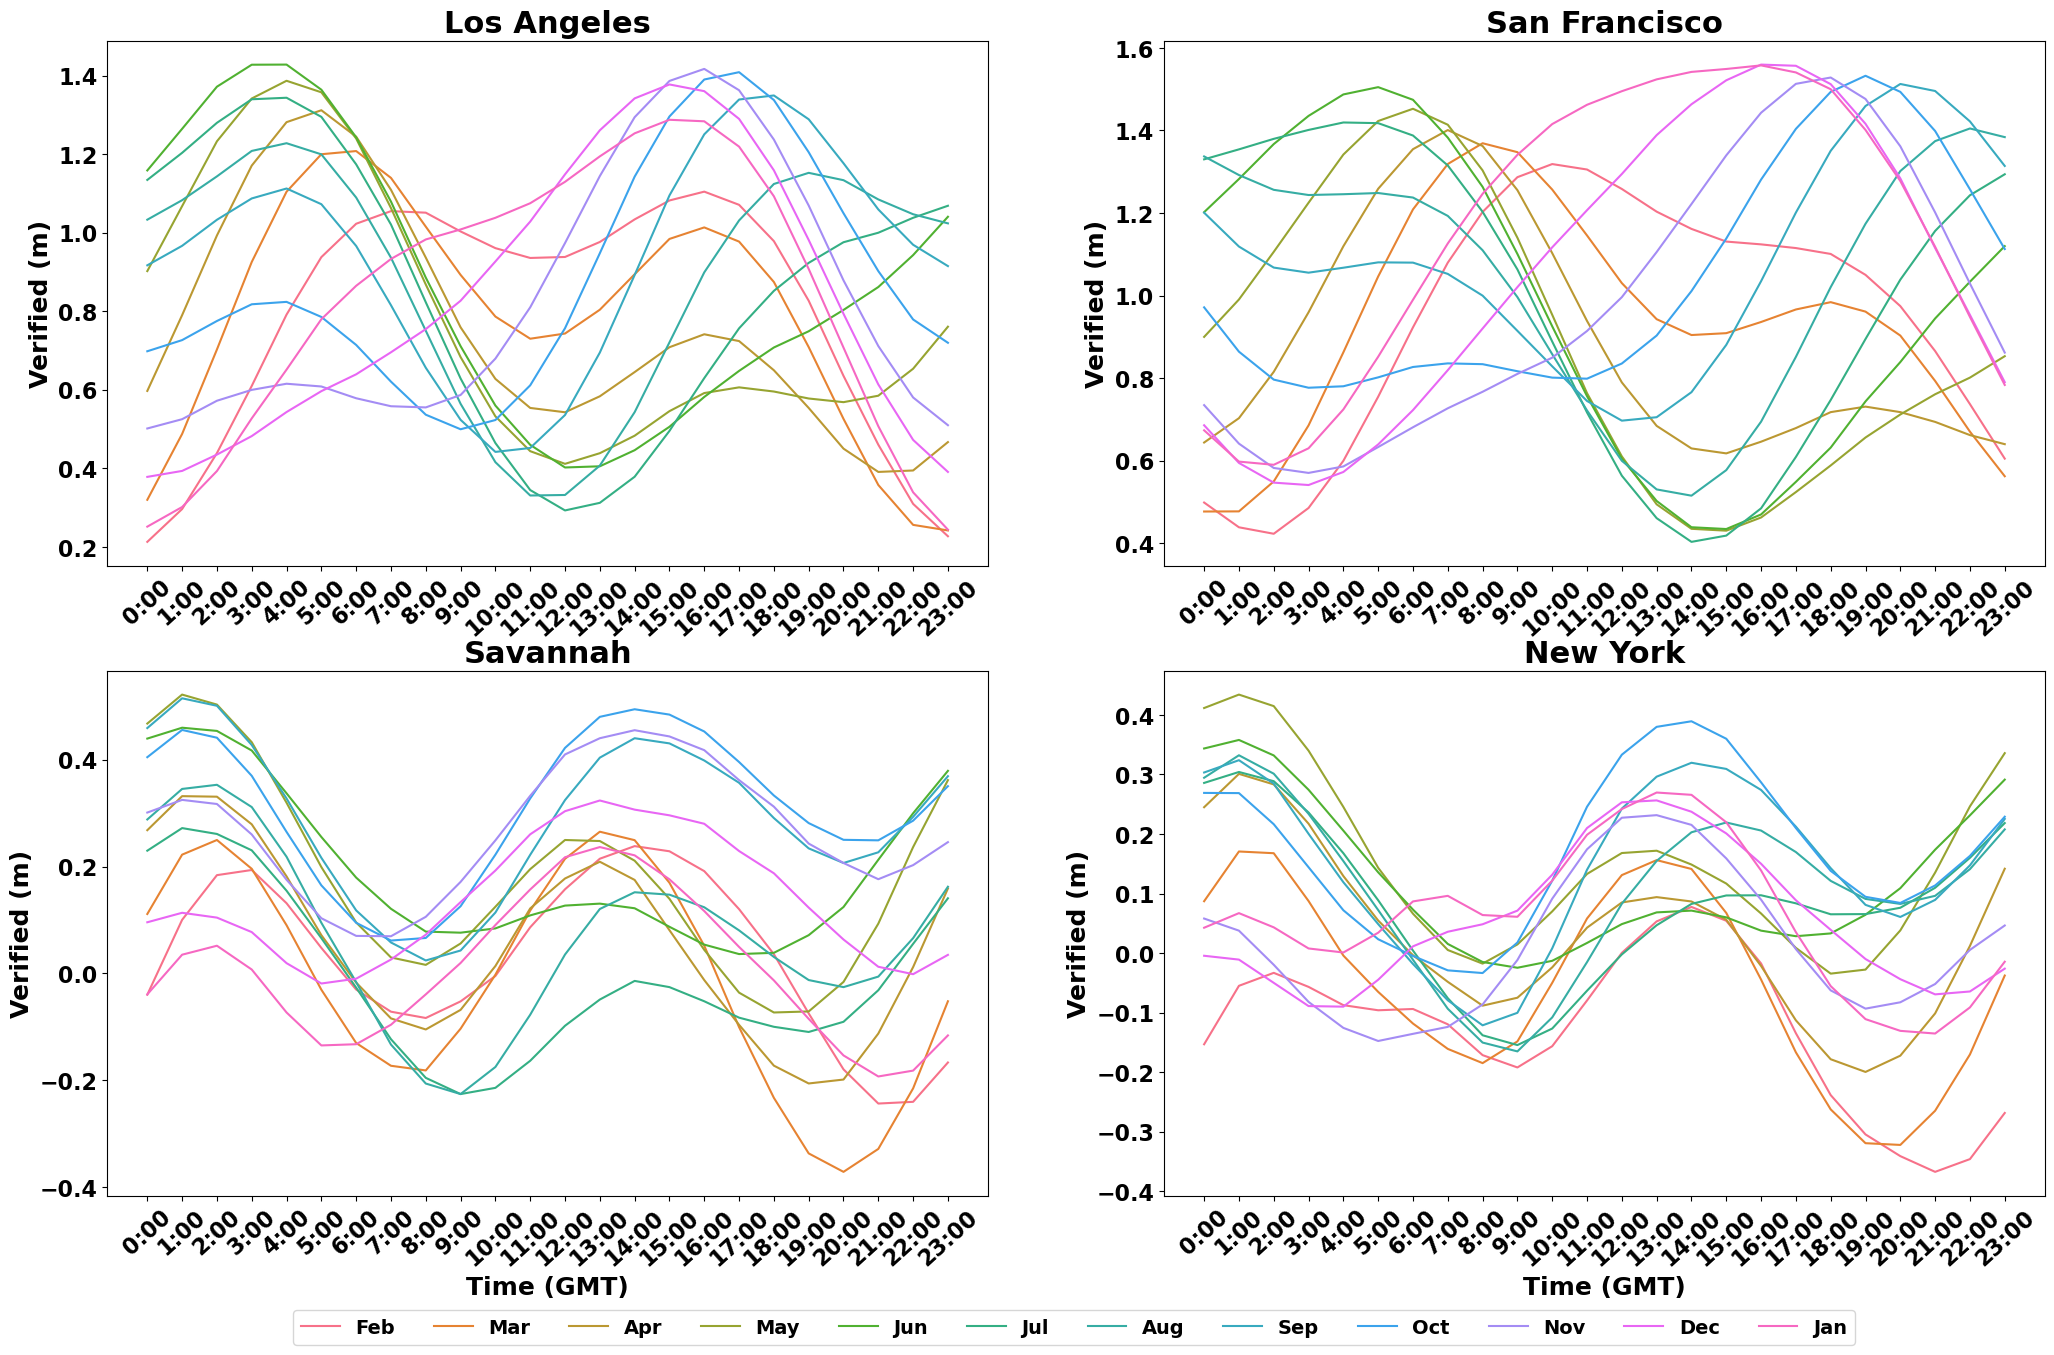

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(25, 15))

#generate
sns.lineplot(legend = False,data = LA_hourly, x='Time (GMT)', y='Verified (m)', hue = 'Month',ci=None, ax=axs[0, 0]).set(title = 'Los Angeles')
axs[0, 0].set_title("Los Angeles", fontsize=22,fontweight='bold')
axs[0, 0].set_xlabel('')

sns.lineplot(legend = False,data = SF_hourly, x='Time (GMT)', y='Verified (m)', hue = 'Month',ci=None,ax=axs[0, 1]).set(title = 'San Francisco')
axs[0, 1].set_title('San Francisco', fontsize=22,fontweight='bold')
axs[0, 1].set_xlabel('')

sns.lineplot(data = FP_hourly, x='Time (GMT)', y='Verified (m)', hue='Month',ci=None, ax=axs[1, 0]).set(title = 'Savannah')
axs[1, 0].set_title('Savannah', fontsize=22,fontweight='bold')
axs[1,0].legend(loc='upper left', bbox_to_anchor=(0.2, -0.2), ncol=12, fontsize=14)
axs[1,0].set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')

sns.lineplot(legend = False,data = NY_hourly, x='Time (GMT)', y='Verified (m)', hue = 'Month',ci=None,ax=axs[1, 1]).set(title = 'New York')
axs[1, 1].set_title('New York', fontsize=22,fontweight='bold')
axs[1, 1].set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')

# format
for ax in axs.flat:
    ax.set_ylabel('Verified (m)', fontsize=18,fontweight='bold')

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=16, rotation=42)
    ax.tick_params(axis='y', labelsize=16)
